<a href="https://colab.research.google.com/github/Mrrohit0806/Capstone-project-01/blob/main/Feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
pd.set_option('display.max_columns', None)

In [40]:
df = pd.read_csv('/content/gurgaon_properties_missing_value_imputation.csv')

In [41]:
df.shape

(3657, 19)

In [42]:
df.head()

,property_type,society,sector,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,Price_in_Crore,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_score_bin
0,flat,m3m heights,sector 65,15794.0,2.0,2,2,26.0,Under Construction,1.99,1260.0,0,0,0,0,0,0,48,"[0, 50)"
1,flat,trisara our homes 3,sohna road,4339.0,1.0,1,0,2.0,Relatively New,0.21,484.0,0,0,0,0,0,0,0,"[0, 50)"
2,flat,sare crescent parc,sector 92,5000.0,2.0,2,3,2.0,Moderately Old,0.50,1000.0,0,0,0,0,0,0,38,"[0, 50)"
3,flat,breez global heights,sohna road,6422.0,2.0,2,2,2.0,New Property,0.42,623.0,0,0,0,0,0,0,73,"[50, 100)"
4,flat,godrej air,sector 85,14541.0,2.0,2,3,30.0,Under Construction,1.30,1016.0,0,0,0,0,0,0,111,"[100, 150)"


In [43]:
#drop luxury score bin
df.drop('luxury_score_bin', axis=1, inplace=True)

In [44]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [45]:
train_df.head()

,property_type,sector,bedRoom,bathroom,balcony,floorNum,agePossession,Price_in_Crore,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 65,2.0,2,2,26.0,Under Construction,1.99,1260.0,0,0,0,0,0,0,48
1,flat,sohna road,1.0,1,0,2.0,Relatively New,0.21,484.0,0,0,0,0,0,0,0
2,flat,sector 92,2.0,2,3,2.0,Moderately Old,0.50,1000.0,0,0,0,0,0,0,38
3,flat,sohna road,2.0,2,2,2.0,New Property,0.42,623.0,0,0,0,0,0,0,73
4,flat,sector 85,2.0,2,3,30.0,Under Construction,1.30,1016.0,0,0,0,0,0,0,111


**luxury score**

<Axes: xlabel='luxury_score'>

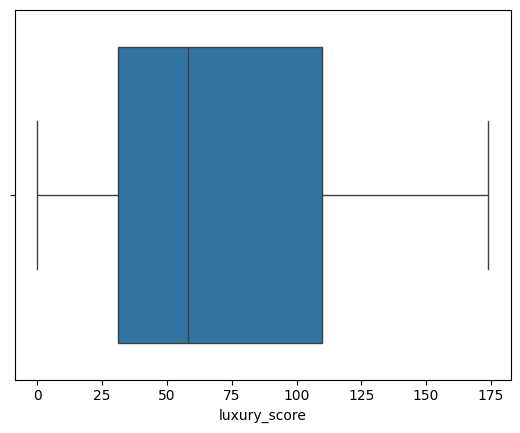

In [46]:
sns.boxplot(x = df['luxury_score'])

In [47]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [48]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [49]:
train_df.head()

,property_type,sector,bedRoom,bathroom,balcony,floorNum,agePossession,Price_in_Crore,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 65,2.0,2,2,26.0,Under Construction,1.99,1260.0,0,0,0,0,0,0,48,Low
1,flat,sohna road,1.0,1,0,2.0,Relatively New,0.21,484.0,0,0,0,0,0,0,0,Low
2,flat,sector 92,2.0,2,3,2.0,Moderately Old,0.50,1000.0,0,0,0,0,0,0,38,Low
3,flat,sohna road,2.0,2,2,2.0,New Property,0.42,623.0,0,0,0,0,0,0,73,Medium
4,flat,sector 85,2.0,2,3,30.0,Under Construction,1.30,1016.0,0,0,0,0,0,0,111,Medium



**floorNum**

<Axes: xlabel='floorNum'>

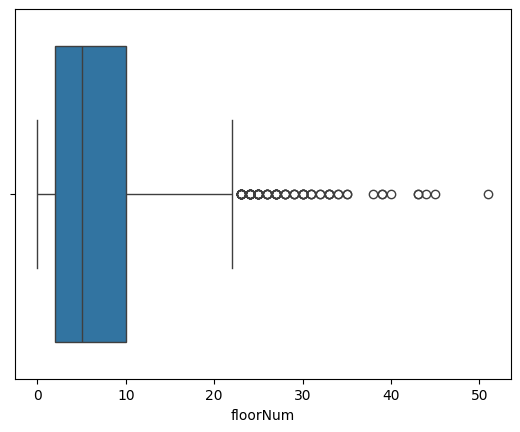

In [50]:
sns.boxplot(x = df['floorNum'])

In [51]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [52]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [53]:
train_df.head()

,property_type,sector,bedRoom,bathroom,balcony,floorNum,agePossession,Price_in_Crore,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 65,2.0,2,2,26.0,Under Construction,1.99,1260.0,0,0,0,0,0,0,48,Low,High Floor
1,flat,sohna road,1.0,1,0,2.0,Relatively New,0.21,484.0,0,0,0,0,0,0,0,Low,Low Floor
2,flat,sector 92,2.0,2,3,2.0,Moderately Old,0.50,1000.0,0,0,0,0,0,0,38,Low,Low Floor
3,flat,sohna road,2.0,2,2,2.0,New Property,0.42,623.0,0,0,0,0,0,0,73,Medium,Low Floor
4,flat,sector 85,2.0,2,3,30.0,Under Construction,1.30,1016.0,0,0,0,0,0,0,111,Medium,High Floor


In [54]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [55]:
train_df.head()

,property_type,sector,bedRoom,bathroom,balcony,agePossession,Price_in_Crore,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 65,2.0,2,2,Under Construction,1.99,1260.0,0,0,0,0,0,0,Low,High Floor
1,flat,sohna road,1.0,1,0,Relatively New,0.21,484.0,0,0,0,0,0,0,Low,Low Floor
2,flat,sector 92,2.0,2,3,Moderately Old,0.50,1000.0,0,0,0,0,0,0,Low,Low Floor
3,flat,sohna road,2.0,2,2,New Property,0.42,623.0,0,0,0,0,0,0,Medium,Low Floor
4,flat,sector 85,2.0,2,3,Under Construction,1.30,1016.0,0,0,0,0,0,0,Medium,High Floor


In [56]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('Price_in_Crore', axis=1)
y_label = data_label_encoded['Price_in_Crore']

[array(['flat', 'house'], dtype=object)]
[array([', delhi ncr', 'acharya puri', 'adarsh nagar', 'alipur',
       'ambience island', 'anand garden, sector-105', "ansal's sector 2",
       'ats marigold', 'b1 block sector 57', 'baldev nagar',
       'begampur khatola', 'bhawani enclave', 'bhim nagar',
       'bhimgarh kheri phase 3', 'bhora kalan', 'bissar',
       'block a sector 21', 'block g sector-57',
       'block h sector 3 phase iii extension', 'bptp',
       'carterpuri village', 'civil l', 'cyber city', 'damdma',
       'daulatabad',
       'devi lal colony gali no 12 gurgaon nr omkar public school',
       'dhankot', 'dwarka expressway', 'faridabad road', 'farukhnagar',
       'g block dlf city phase 1', 'garauli kalan', 'garhi harsaru',
       'godrej aria , sector 79 ,', 'golf course ext road',
       'golf course road', 'gopal nagar, garhi ghasita, sonipat',
       'gwal pahari', 'heritage city', 'hira nagar',
       'hno 13 sagar enclave sura', 'iffco chowk', 'imt manesar'

In [57]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,168.0,2.0,2,2.0,4.0,1260.0,0,0,0,0,0,0,1.0,0.0
1,0.0,221.0,1.0,1,0.0,3.0,484.0,0,0,0,0,0,0,1.0,1.0
2,0.0,201.0,2.0,2,3.0,0.0,1000.0,0,0,0,0,0,0,1.0,1.0
3,0.0,221.0,2.0,2,2.0,1.0,623.0,0,0,0,0,0,0,2.0,1.0
4,0.0,193.0,2.0,2,3.0,4.0,1016.0,0,0,0,0,0,0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3652,0.0,170.0,3.0,4,4.0,3.0,2452.0,0,1,0,1,0,2,2.0,0.0
3653,0.0,151.0,3.0,3,4.0,0.0,1950.0,0,0,0,0,0,2,0.0,2.0
3654,0.0,120.0,2.0,2,1.0,3.0,795.0,1,0,0,0,0,2,2.0,2.0
3655,0.0,86.0,2.0,2,2.0,3.0,1550.0,0,0,0,0,0,0,2.0,0.0


In [58]:
y_label

,Price_in_Crore
0,1.99
1,0.21
2,0.50
3,0.42
4,1.30
...,...
3652,3.15
3653,2.35
3654,0.55
3655,1.59


**Technique 1 - Correlation Analysis**

<Axes: >

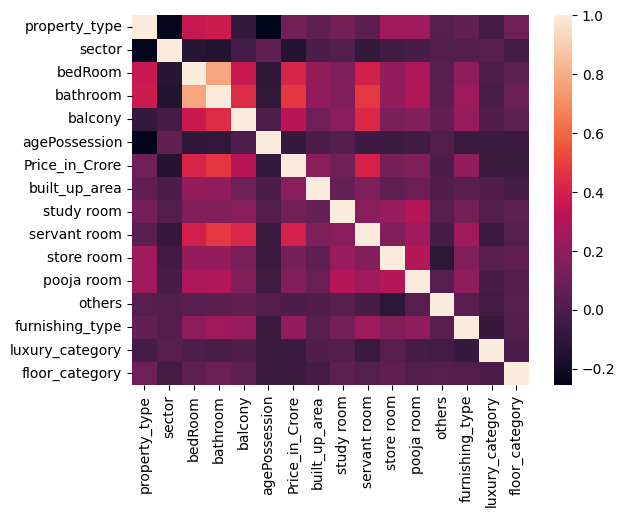

In [59]:
sns.heatmap(data_label_encoded.corr())

In [60]:
fi_df1 = data_label_encoded.corr()['Price_in_Crore'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','Price_in_Crore':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.135729
1,bedRoom,0.420967
2,bathroom,0.472460
3,balcony,0.321191
4,agePossession,-0.077464
5,Price_in_Crore,1.000000
6,built_up_area,0.179023
7,study room,0.107935
8,servant room,0.406055
9,store room,0.124910


**Technique 2 - Random Forest Feature Importance**

In [61]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.432071
1,sector,0.295730
3,bathroom,0.084247
0,property_type,0.067132
2,bedRoom,0.024170
4,balcony,0.022314
5,agePossession,0.017852
14,floor_category,0.012298
13,luxury_category,0.010088
8,servant room,0.009492



**Technique 3 - Gradient Boosting Feature importances**

In [62]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.438313
1,sector,0.322173
0,property_type,0.101275
3,bathroom,0.092826
8,servant room,0.019179
4,balcony,0.006611
14,floor_category,0.005243
12,furnishing_type,0.004638
5,agePossession,0.003624
2,bedRoom,0.003562


**Technique 4 - Permutation Importance**

In [63]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.742855
1,sector,0.488509
0,property_type,0.318988
3,bathroom,0.059418
2,bedRoom,0.053617
4,balcony,0.017380
5,agePossession,0.007388
14,floor_category,0.004764
13,luxury_category,0.002628
11,others,0.000913


**Technique 5 - LASSO**

In [64]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
3,bathroom,0.348421
8,servant room,0.246007
2,bedRoom,0.144231
4,balcony,0.095503
6,built_up_area,0.087962
12,furnishing_type,0.077205
9,store room,0.008264
7,study room,0.005472
10,pooja room,-0.008807
11,others,-0.016876


**Technique 6 - RFE**

In [65]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
6,built_up_area,0.437203
1,sector,0.290276
3,bathroom,0.089163
0,property_type,0.063936
2,bedRoom,0.023384
4,balcony,0.022456
5,agePossession,0.018053
14,floor_category,0.011485
8,servant room,0.009837
12,furnishing_type,0.009474


**Technique 7 - Linear Regression Weights**

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Train a linear regression model on the label-encoded and standardized training data
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
3,bathroom,0.358093
8,servant room,0.244931
2,bedRoom,0.151398
6,built_up_area,0.095315
4,balcony,0.094974
12,furnishing_type,0.084162
9,store room,0.020996
7,study room,0.018945
11,others,-0.025576
10,pooja room,-0.028484


In [67]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').set_index('feature')

In [68]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs
feature,,,,,,,
sector,-0.135729,0.295730,0.322173,0.488509,-0.102197,0.290276,-0.114582
bedRoom,0.420967,0.024170,0.003562,0.053617,0.144231,0.023384,0.151398
bathroom,0.472460,0.084247,0.092826,0.059418,0.348421,0.089163,0.358093
balcony,0.321191,0.022314,0.006611,0.017380,0.095503,0.022456,0.094974
agePossession,-0.077464,0.017852,0.003624,0.007388,-0.050470,0.018053,-0.065044
built_up_area,0.179023,0.432071,0.438313,0.742855,0.087962,0.437203,0.095315
study room,0.107935,0.004543,0.000049,0.000628,0.005472,0.004566,0.018945
servant room,0.406055,0.009492,0.019179,-0.000552,0.246007,0.009837,0.244931
store room,0.124910,0.003524,0.000000,-0.000432,0.008264,0.003202,0.020996


In [69]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [71]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score']].mean(axis=1).sort_values(ascending=False)

,0
feature,
built_up_area,0.489255
sector,0.335025
bathroom,0.082992
bedRoom,0.023441
balcony,0.016970
agePossession,0.011954
servant room,0.010406
floor_category,0.008685
furnishing_type,0.006241


In [72]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,168.0,2.0,2,2.0,4.0,1260.0,0,0,0,0,0,0,1.0,0.0
1,0.0,221.0,1.0,1,0.0,3.0,484.0,0,0,0,0,0,0,1.0,1.0
2,0.0,201.0,2.0,2,3.0,0.0,1000.0,0,0,0,0,0,0,1.0,1.0
3,0.0,221.0,2.0,2,2.0,1.0,623.0,0,0,0,0,0,0,2.0,1.0
4,0.0,193.0,2.0,2,3.0,4.0,1016.0,0,0,0,0,0,0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3652,0.0,170.0,3.0,4,4.0,3.0,2452.0,0,1,0,1,0,2,2.0,0.0
3653,0.0,151.0,3.0,3,4.0,0.0,1950.0,0,0,0,0,0,2,0.0,2.0
3654,0.0,120.0,2.0,2,1.0,3.0,795.0,1,0,0,0,0,2,2.0,2.0
3655,0.0,86.0,2.0,2,2.0,3.0,1550.0,0,0,0,0,0,0,2.0,0.0


In [73]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [74]:
scores.mean()

np.float64(0.7698123345511109)

In [75]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [76]:
scores.mean()

np.float64(0.7747904977000766)

In [77]:
df.head()

,property_type,society,sector,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,Price_in_Crore,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,m3m heights,sector 65,15794.0,2.0,2,2,26.0,Under Construction,1.99,1260.0,0,0,0,0,0,0,48
1,flat,trisara our homes 3,sohna road,4339.0,1.0,1,0,2.0,Relatively New,0.21,484.0,0,0,0,0,0,0,0
2,flat,sare crescent parc,sector 92,5000.0,2.0,2,3,2.0,Moderately Old,0.50,1000.0,0,0,0,0,0,0,38
3,flat,breez global heights,sohna road,6422.0,2.0,2,2,2.0,New Property,0.42,623.0,0,0,0,0,0,0,73
4,flat,godrej air,sector 85,14541.0,2.0,2,3,30.0,Under Construction,1.30,1016.0,0,0,0,0,0,0,111


In [78]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['Price_in_Crore'] = y_label

In [79]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [80]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,Price_in_Crore
0,0.0,168.0,2.0,2,2.0,4.0,1260.0,0,0,0,1.0,0.0,1.99
1,0.0,221.0,1.0,1,0.0,3.0,484.0,0,0,0,1.0,1.0,0.21
2,0.0,201.0,2.0,2,3.0,0.0,1000.0,0,0,0,1.0,1.0,0.50
3,0.0,221.0,2.0,2,2.0,1.0,623.0,0,0,0,2.0,1.0,0.42
4,0.0,193.0,2.0,2,3.0,4.0,1016.0,0,0,0,2.0,0.0,1.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3652,0.0,170.0,3.0,4,4.0,3.0,2452.0,1,0,2,2.0,0.0,3.15
3653,0.0,151.0,3.0,3,4.0,0.0,1950.0,0,0,2,0.0,2.0,2.35
3654,0.0,120.0,2.0,2,1.0,3.0,795.0,0,0,2,2.0,2.0,0.55
3655,0.0,86.0,2.0,2,2.0,3.0,1550.0,0,0,0,2.0,0.0,1.59
